In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML Zoomcamp/Datasets/car_price.csv')

In [3]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
#make all columns lowercase and replacing ' ' with '_'

df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
'''same problem with the values in the columns-> Detect object columns and replace all the values as
above
'''
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [7]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


**EDA**

In [10]:
#looking at each column and printing some values
for col in df.columns:
  print(col)
  print(df[col].head())
  print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [11]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print("Number of unique values are: ",df[col].nunique())
  print()


make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
Number of unique values are:  48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-c

Distribution of Price

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

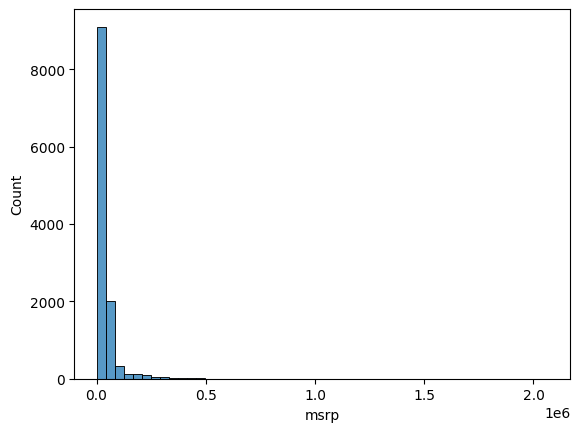

In [13]:
sns.histplot(df.msrp,bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

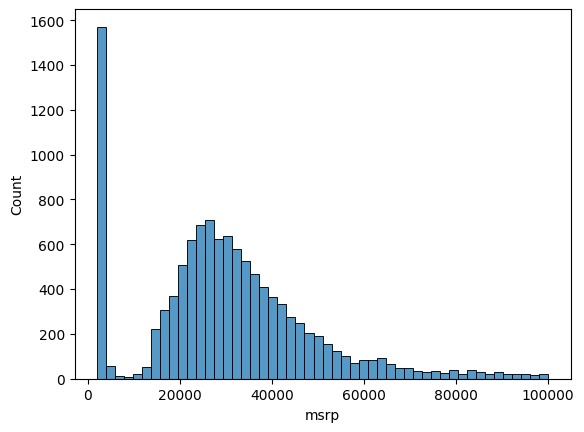

In [14]:
sns.histplot(df.msrp[df.msrp<100000],bins=50)

This kind of distribution (long tail, and the peak) is not good for ML models, because this distribution will confuse them.There is a way to get rid of the long tail, by applying logarithm to the price. This results in more compact values.

<Axes: xlabel='msrp', ylabel='Count'>

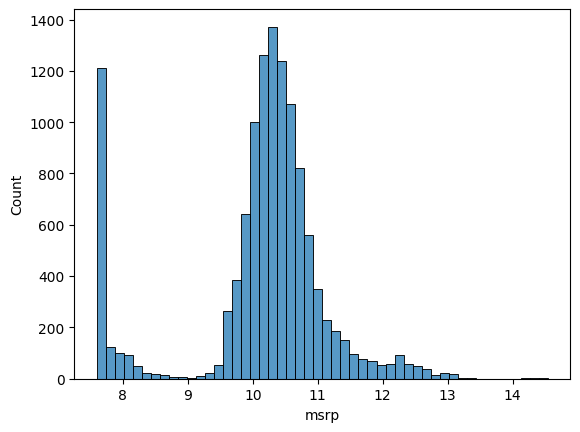

In [15]:
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs,bins=50)

Missing Values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [17]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [18]:
# Impute missing numerical values with mean
df['engine_hp'].fillna(df['engine_hp'].mean(), inplace=True)
df['engine_cylinders'].fillna(df['engine_cylinders'].mean(), inplace=True)

In [19]:
# Impute missing categorical values with most frequent category
df['market_category'].fillna(df['market_category'].mode()[0], inplace=True)
df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      6
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [21]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [22]:
df.duplicated().sum()

715

In [23]:
df.shape

(11914, 16)

In [24]:
#removing duplicate recors as the records are enough

input_data = df.drop_duplicates()

# **Setting up the validation framework**

In [25]:
n = len(input_data)
n_val = n_test = int(n*0.2)
n_train = n-n_val-n_test
print(n,n_val+n_test+n_train) #complete dataset size

11199 11199


In [26]:
n_val,n_test,n_train #sizes of individual sets

(2239, 2239, 6721)

In [27]:
df_train = input_data.iloc[:n_train]
df_val = input_data.iloc[n_train:n_train+n_val]
df_test = input_data.iloc[n_train+n_val:]


 This approach brings us to the problem that it’s sequential. That’s a problem when there is an order in the dataset. That means we need to shuffle, otherwise, there are BMWs only in one dataset. Generally shuffling is always a good idea.

In [28]:
idx=np.arange(n)
np.random.shuffle(idx)
print(idx)

[1936 2511 6866 ... 1654 1549 6689]


In [29]:
df_train = input_data.iloc[idx[:n_train]]
df_val = input_data.iloc[idx[n_train:n_train+n_val]]
df_test = input_data.iloc[idx[n_train+n_val:]]


Now there is no order in the index column so we can reset index and drop the old index column.

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

apply the log1p transformation to the price column to help the model perform well.

In [31]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


There is one final but very important step. We should remove msrp values from dataframes (df_train, df_val, df_test) to make sure that we don’t accidentally use it for training purposes.

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Now our data is ready and we will study about our model that we are going to use is Linear Regression

# Linear Regression

Linear regression is a fundamental statistical technique used in the field of machine learning for solving regression problems. In simple terms, regression analysis involves predicting a continuous outcome variable based on one or more input features. That means the output of the model is a number.

In the case of linear regression, the basic idea is to find the best-fitting linear relationship between the input features and the output variable. This relationship is represented by a linear equation of the form:

              y = w0 + w1x1 + w2x2 + … + wnxn
Here, “y” represents the output variable, and x1, x2, …, xn represent the input features. The w0, w1, w2, …, wn are the coefficients that determine the relationship between the input features and the output variable.

The goal of linear regression is to estimate the values of these coefficients in such a way that the sum of squared differences between the observed and predicted values is minimized. This minimization is typically achieved using a method called “ordinary least squares,” which calculates the best-fitting line by minimizing the sum of the squared errors between the predicted and actual values.

In [33]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

**Baseline Solution**

we start with a simple model while we’re using only numerical columns.

In [34]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [37]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,302.0,6.0,28,20,617
1,230.0,8.0,17,13,1385
2,235.0,4.0,28,21,454
3,204.0,6.0,30,21,454
4,140.0,4.0,30,21,26


In [38]:
#extracting values to use them in training
X_train = df_train[base].values
X_train

array([[ 302.,    6.,   28.,   20.,  617.],
       [ 230.,    8.,   17.,   13., 1385.],
       [ 235.,    4.,   28.,   21.,  454.],
       ...,
       [ 306.,    6.,   25.,   18., 2009.],
       [ 171.,    4.,   28.,   20.,  586.],
       [ 285.,    6.,   22.,   17., 1385.]])

In [40]:
w0,w=train_linear_regression(X_train,y_train)
w0,w

(7.907421434091947,
 array([ 8.72855706e-03, -1.21085065e-01,  4.46918378e-02, -2.22768244e-02,
        -1.25357136e-05]))

In [41]:
y_pred = w0 + X_train.dot(w)
y_pred

array([10.61503572,  9.3991096 , 10.25215902, ..., 10.54297837,
        9.71415348, 10.25570226])

**Plotting model performance**

<Axes: ylabel='Count'>

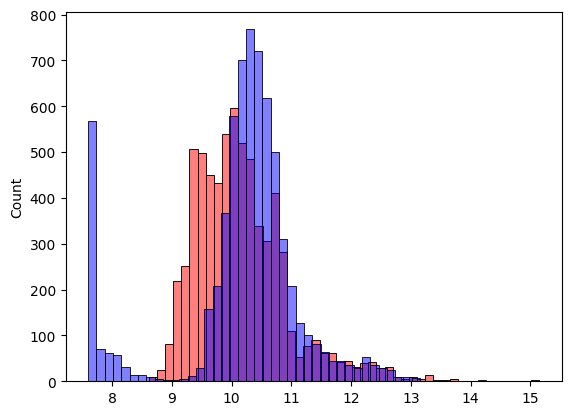

In [42]:
# alpha changes the transparency of the bars
# bins specifies the number of bars
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

**Root mean Square Error**

In [43]:
def rmse(y,y_pred):
  se=(y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [44]:
rmse(y_train, y_pred)


0.7299527466723085

**Validating the model**

In [45]:
def prepare_X(df):
  df_num = df[base]
  X = df_num.values
  return X

In [46]:
# Training part:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation part:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# Evaluation part:
rmse(y_val, y_pred)


0.738577319689489